# NLP medical records

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)

import numpy as np
import pickle

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# dimensionality reduction
from sklearn.decomposition import PCA

# topic modeling
from sklearn.decomposition import TruncatedSVD, NMF
from gensim import corpora, models, matutils

# wordCloud
from wordcloud import WordCloud

#content-based filtering
from sklearn.metrics import pairwise_distances

## 1. Load corpus

In [2]:
# open pickle
with open("cleanCorpus.pickle", "rb") as f:
    cleanCorpus = pickle.load(f)

In [3]:
cleanCorpus[10]

'preoperative diagnosis morbid obesity postoperative diagnosis morbid obesity procedure laparoscopic roux gastric bypass antecolic antegastric with anastamosis esophagogastroduodenoscopy anesthesia general with endotracheal intubation indication procedure this year male been overweight many year tried multiple different weight loss diet program patient begun have comorbidities related obesity patient attended bariatric seminar with dietician psychologist patient read through comprehensive handout understands risk benefit bypass surgery evidenced signing consent form procedure detail risk benefit were explained patient consent obtained patient taken operating room placed supine operating room table general anesthesia administered with endotracheal intubation foley catheter placed bladder decompression pressure point were carefully padded sequential compression device were placed leg abdomen prepped draped standard sterile surgical fashion marcaine injected into umbilicus'

In [4]:
# len should be 1,740
len(cleanCorpus)

1740

## 2. Vectorizing

#### Term Frequency Inverse Document Frequency: TF-IDF

In [5]:
# initialize tv fit
# strip_accents, remove non ascii characters
tv = TfidfVectorizer(stop_words='english', strip_accents='ascii')

# corpus: list of strings 
doc_term = tv.fit_transform(cleanCorpus)

# create df of document term matrix
tv_df = pd.DataFrame(doc_term.toarray(), columns = tv.get_feature_names_out())

In [6]:
tv_df.head()

,abadeedleedlebadle,abandoned,abbott,abcd,abdomen,abdominal,abdominally,abdominis,abdominopelvic,abdominosacrocolpopexy,...,zosyn,zuba,zumi,zung,zygoma,zygomatic,zymar,zyprexa,zyrtec,zyvox
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203695,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.022665,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [7]:
# shape (1740, 14758)
tv_df.shape

(1740, 14758)

## 3. Dimensionality reduction

### Topic modeling: NMF

In [8]:
n = 10
topicName = ['topic_' + str(i) for i in range(1,n+1)]

nmf = NMF(n, init='nndsvda')
nmf.fit(doc_term)

doc_topic_nmf = nmf.fit_transform(doc_term)
doc_topic_nmf_df = pd.DataFrame(doc_topic_nmf.round(2), columns=topicName)

doc_topic_nmf_df.head(2)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,0.0,0.11,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0
1,0.0,0.15,0.02,0.0,0.01,0.0,0.0,0.0,0.02,0.0


In [9]:
df2 = doc_topic_nmf_df.copy()

In [10]:
df2['most_common'] = df2.idxmax(axis=1)

In [11]:
df2.head(1)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,most_common
0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,topic_2


In [12]:
countTopic = df2['most_common'].value_counts()
countTopic

topic_2     475
topic_1     247
topic_6     227
topic_9     158
topic_10    141
topic_4     135
topic_7     115
topic_3     112
topic_5      89
topic_8      41
Name: most_common, dtype: int64

Text(0.5, 0, 'Number of documents')

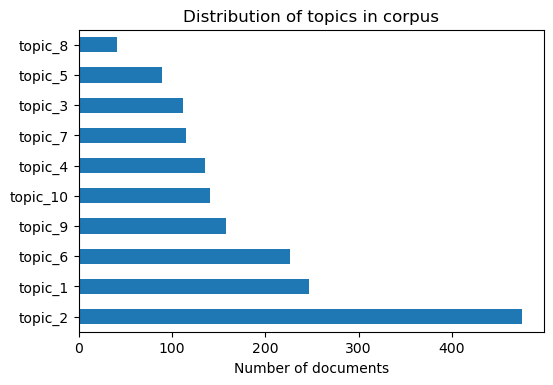

In [13]:
plt.figure(dpi=100)
countTopic.plot.barh()
plt.title('Distribution of topics in corpus')
plt.xlabel("Number of documents")
#plt.savefig('topics_distribution.png')

In [14]:
def display_topics(model, num_top_words): 
    
    feature_names = tv.get_feature_names_out()
    
    # save features in a nested list 
    topic_word_list = []
    for ix, topic in enumerate(model.components_):
        
        # argsort(), sorts index from low to high value
        # pick index with highest value
        # reverse array and choose last n (last highest values )
        sortIdxArr = np.flip(topic.argsort())
        features = []
        
        for i in range(num_top_words):
            features.append(feature_names[sortIdxArr[i]])
        
        print("\nTopic ", ix + 1)                               
        print(", ".join(features))
        
        topic_word_list.append(features)
    
    return topic_word_list

In [15]:
topic_word_list = display_topics(nmf, 10)


Topic  1
suture, placed, incision, skin, procedure, closed, using, patient, vicryl, fascia

Topic  2
patient, history, pain, doe, medication, past, daily, clear, time, year

Topic  3
artery, coronary, left, catheter, right, stenosis, aortic, branch, french, circumflex

Topic  4
port, uterus, gallbladder, placed, uterine, abdomen, trocar, cervix, tube, incision

Topic  5
colon, polyp, scope, colonoscopy, cecum, procedure, biopsy, rectum, esophagus, normal

Topic  6
normal, left, right, unremarkable, exam, image, mild, seen, evidence, mass

Topic  7
lens, chamber, procedure, patient, needle, cataract, used, placed, injected, anterior

Topic  8
carpal, tunnel, ligament, transverse, ulnar, release, nerve, syndrome, distal, tourniquet

Topic  9
foot, knee, metatarsal, medial, right, joint, tourniquet, patient, lateral, screw

Topic  10
bladder, lobe, tumor, right, biopsy, prostate, patient, carcinoma, node, left


## WordCloud 

In [16]:
wc = (WordCloud(width=300, 
                height=150, 
                margin=3,  
                prefer_horizontal=0.7,
                scale=1,
                background_color='white', 
                relative_scaling=0,
               ))

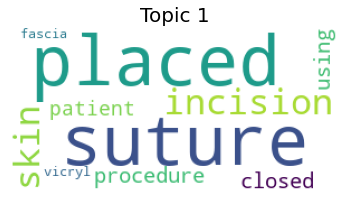

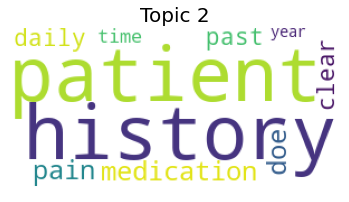

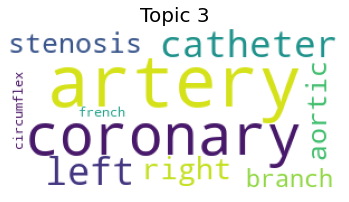

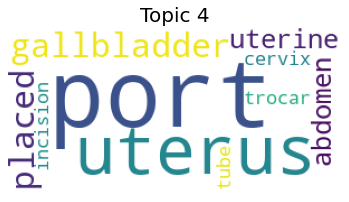

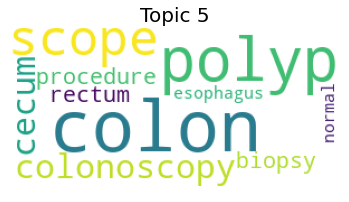

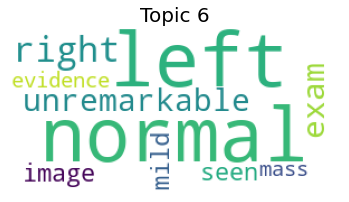

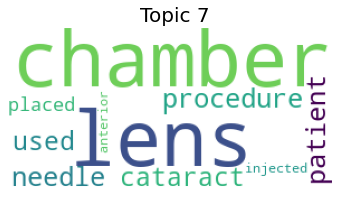

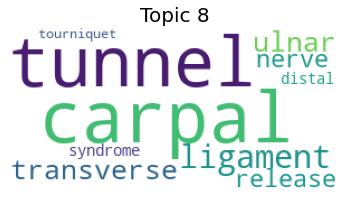

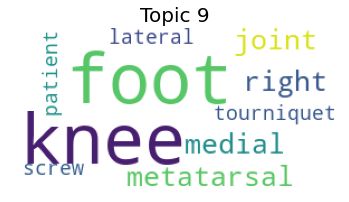

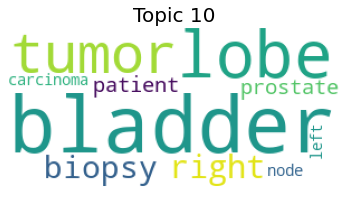

In [17]:
for idx, words in enumerate(topic_word_list):
    long_string = ','.join(words)
    
    wc.generate(long_string)
    plt.imshow(wc)
    plt.title(f"Topic {idx+1}", size=20)
    plt.axis('off')
    plt.show()

## 4. Recommendation system

In [18]:
def nearestDist(user_idx, points_arr):
    print('Current doc:', user_idx)
    
    dist = pairwise_distances(points_arr[user_idx].reshape(1, -1), points_arr)

    currentPoint_dist = dist[0][user_idx]
    # check that zero
    #print('Distance of curent point to itself:', round(currentPoint_dist,2))
    
    print('The 3 recommended documents are:')
    
    # sort array by index, low to high,use array at index 0
    # nearest point is shortest distance
    sort_dist = dist.argsort()[0]
     
    # first point is the actual user, so start with second point
    for i in sort_dist[1:4]:
        print('doc {}: distance {}'.format(i, round(dist[0][i],3)))
        #dist_diff = (dist[0][i] - currentPoint_dist) * 100

        #print('doc {}: {} % different'.format(i, round(dist_diff,2)))
    
    print("")
    
    # statistics of distance
    print('Summary statistics of the distance:')
    print("Maximum distance:", max(dist[0]).round(3))
    print("Average distance is:", np.mean((dist[0])).round(3))
    
    return None

In [20]:
nearestDist(88, doc_topic_nmf)

Current doc: 88
The 3 recommended documents are:
doc 92: distance 0.003
doc 81: distance 0.011
doc 64: distance 0.015

Summary statistics of the distance:
Maximum distance: 0.397
Average distance is: 0.168


In [21]:
cleanCorpus[88]

'preoperative diagnosis right inguinal hernia postoperative diagnosis right inguinal hernia procedure right inguinal hernia repair indication procedure this patient year with history intermittent swelling right inguinal area consistent with right inguinal hernia patient being taken operating room inguinal hernia repair description procedure patient taken operating room placed supine under general endotracheal anesthesia patient inguinal scrotal area were prepped draped usual sterile fashion incision made right inguinal skin crease incision taken down level aponeurosis external oblique which incised level external ring hernia verified dissected level internal ring high ligation performed distal remnant taken excised testicle cord structure were placed back their native position aponeurosis external oblique reapproximated with vicryl well scarpa skin closed with monocryl dressed with steri strip patient extubated operating room taken back recovery room patient tolerated procedure well'

In [22]:
cleanCorpus[92]

'preoperative diagnosis left inguinal hernia postoperative diagnosis left direct indirect inguinal hernia procedure performed repair left inguinal hernia with prolene mesh anesthesia sedation with local complication none disposition patient tolerated procedure well transferred recovery stable condition specimen hernia well turbid fluid with gram stain which came back with organism from hernia brief history this year male presented office with bulge left groin found have left inguinal hernia increasing over past several month patient history multiple abdominal surgery opted open left inguinal hernial repair with prolene mesh intraoperative finding patient found have direct well indirect component left inguinal hernia with large patient also found have some turbid fluid within hernia which sent down gram stain turned negative with organism procedure after informed consent risk benefit procedure were explained patient patient brought operative suite prepped draped normal sterile fashion l

In [23]:
nearestDist(10, doc_topic_nmf)

Current doc: 10
The 3 recommended documents are:
doc 1495: distance 0.017
doc 145: distance 0.021
doc 1491: distance 0.022

Summary statistics of the distance:
Maximum distance: 0.382
Average distance is: 0.124
